# Modeling Your Data 

## Introduction 

In this lesson you'll review the modeling process for running regression or similar statistical experiments.

## Objectives
You will be able to:

* Identify target variables and predictor variables
* Identify the steps involved in building a machine learning model

## Fitting an Initial Model

Here is a quick review of building a linear regression model. You can also use the scikit-learn package to do this, but you won't get as many descriptive statistics.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('mpg excercise.xls')
df.head()

,MPG Highway,Passengers,Length,Wheelbase,Width,U Turn Space,Rear seat,Luggage,Weight,Horsepower,Fueltank
0,31,5,177,102,68,37,26.5,11,2705,140,13.2
1,25,5,195,115,71,38,30.0,15,3560,200,18.0
2,26,5,180,102,67,37,28.0,14,3375,172,16.9
3,26,6,193,106,70,37,31.0,17,3405,172,21.1
4,30,4,186,109,69,39,27.0,13,3640,208,21.1


In [3]:
# Define the problem
outcome = 'MPG_Highway'
x_cols = ['Passengers', 'Length', 'Wheelbase', 'Width', 'U_Turn_Space',
          'Rear_seat', 'Luggage', 'Weight', 'Horsepower', 'Fueltank']

In [4]:
# Some brief preprocessing
df.columns = [col.replace(' ', '_') for col in df.columns]
for col in x_cols:
    df[col] = (df[col] - df[col].mean())/df[col].std()
df.head()

,MPG_Highway,Passengers,Length,Wheelbase,Width,U_Turn_Space,Rear_seat,Luggage,Weight,Horsepower,Fueltank
0,31,-0.082794,-0.424883,-0.285386,-0.364210,-0.607145,-0.456945,-0.992270,-0.623674,-0.073088,-1.056458
1,25,-0.082794,0.807793,1.620864,0.429654,-0.296901,0.723496,0.326032,0.825733,1.072509,0.407238
2,26,-0.082794,-0.219437,-0.285386,-0.628831,-0.607145,0.048958,-0.003544,0.512118,0.537897,0.071808
3,26,0.879689,0.670829,0.301153,0.165033,-0.607145,1.060764,0.985183,0.562975,0.537897,1.352541
4,30,-1.045278,0.191455,0.741057,-0.099589,0.013344,-0.288310,-0.333119,0.961350,1.225256,1.352541


In [5]:
from statsmodels.formula.api import ols

In [6]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MPG_Highway   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     24.03
Date:                Mon, 30 Sep 2019   Prob (F-statistic):           2.02e-20
Time:                        17:09:01   Log-Likelihood:                -223.47
No. Observations:                  93   AIC:                             468.9
Df Residuals:                      82   BIC:                             496.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       29.0860      0.295     98.465      0.000      28.498      29.674
Passengers      -1.0138      0.577     -1.757      0.083      -2.162       0.134
Length           0.4625      0.624      0.741      0.461      -0.779       1.704
Wheelbase        1.9899      0.833      2.389      0.019       0.333       3.647
Width            1.2067      0.759      1.591      0.115      -0.302       2.716
U_Turn_Space    -0.4858      0.545     -0.892      0.375      -1.570       0.598
Rear_seat        0.2338      0.459      0.509      0.612      -0.679       1.147
Luggage          0.3229      0.447      0.723      0.472      -0.566       1.212
Weight          -5.2787      1.220     -4.327      0.000      -7.705      -2.852
Horsepower      -0.1101      0.660     -0.167      0.868      -1.422       1.202
Fueltank        -1.6742      0.703     -2.383      0.019      -3.072      -0.276
==============================================================================
Omnibus:                       15.867   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.638
Skew:                           0.749   Prob(JB):                     7.36e-06
Kurtosis:                       4.963   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Assessing the Model
 
When performing an initial assessment of the model you might focus on a number of different perspectives. There are metrics assessing the overall accuracy of the model including $r^2$ and mean square error. There are also many metrics when analyzing how various features contribute to the overall model. These are essential to building a story and intuition behind the model so that educated business strategies can be implemented to optimize the target variable. After all, typically you aren't solely interested in predicting a quantity in a black box given said information. Rather, you would often like to know the underlying influencers and how those can be adjusted in order to increase or decrease the final measured quantity whether it be sales, customer base, costs, or risk. Such metrics would include p-values associated with the various features, comparing models with features removed and investigating potential multicollinearity in the model. Multicollinearity also touches upon checking model assumptions. One underlying intuition motivating the regression model is that the features constitute a *set of levers* which, if appropriately adjusted, account for the target variable. The theory then goes that the errors should be simply the cause of noise in our measurements, or smaller unaccounted factors. These errors are then assumed to be normally distributed. 

## Comments on P-Values

Based on the p-values above, you can see that there are a number of extraneous features. Recall that a common significance cutoff is 0.05. The refined model should eliminate these irrelevant features.

## Initial Refinement

In [7]:
outcome = 'MPG_Highway'
x_cols = ['Passengers', 'Wheelbase', 'Weight', 'Fueltank']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MPG_Highway   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     58.19
Date:                Mon, 30 Sep 2019   Prob (F-statistic):           6.35e-24
Time:                        17:09:02   Log-Likelihood:                -226.97
No. Observations:                  93   AIC:                             463.9
Df Residuals:                      88   BIC:                             476.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.0860      0.296     98.232      0.000      28.498      29.674
Passengers    -1.0457      0.418     -2.501      0.014      -1.877      -0.215
Wheelbase      2.8249      0.713      3.960      0.000       1.407       4.243
Weight        -4.9206      0.894     -5.505      0.000      -6.697      -3.144
Fueltank      -1.4385      0.668     -2.154      0.034      -2.766      -0.111
==============================================================================
Omnibus:                       10.649   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               15.761
Skew:                           0.489   Prob(JB):                     0.000378
Kurtosis:                       4.763   Cond. No.                         6.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> **Comments:** Note that while the $r^2$ value did drop, it did so only marginally despite dropping 6/10 of the original features. Additionally, all of the p-values indicate that all of the current features are substantially influential.

## Additional Assessments and Refinement

Now that you've made some initial refinements to the model, it's time to continue checking further assumptions.

## Checking for Multicollinearity

While you've examined the bi-variable relations previously by examining pair-wise correlation between features, you haven't fully accounted for multicollinearity which is a relation of 3 or more variables. One test for this is the [variance inflation factor](https://en.wikipedia.org/wiki/Variance_inflation_factor). Typically, variables with a vif of 5 or greater (or more definitively 10 or greater) are displaying multicollinearity with other variables in the feature set. We we'll check this here:  

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [9]:
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('Passengers', 1.972330344357365),
 ('Wheelbase', 5.743165022553869),
 ('Weight', 9.016035842933373),
 ('Fueltank', 5.032060527995974)]

> **Comment:** While the p-values indicate that all of the current features are impactful, the variance inflation factor indicates that there is moderate multicollinearity between our variables. With that, it makes sense to briefly update the features once again and recheck for multicollinearity.

In [10]:
outcome = 'MPG_Highway'
x_cols = ['Passengers', 'Wheelbase', 'Fueltank']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MPG_Highway   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     50.77
Date:                Mon, 30 Sep 2019   Prob (F-statistic):           3.21e-19
Time:                        17:09:02   Log-Likelihood:                -240.73
No. Observations:                  93   AIC:                             489.5
Df Residuals:                      89   BIC:                             499.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.0860      0.341     85.203      0.000      28.408      29.764
Passengers    -0.8302      0.480     -1.730      0.087      -1.784       0.123
Wheelbase      0.4075      0.648      0.629      0.531      -0.881       1.696
Fueltank      -4.1077      0.529     -7.759      0.000      -5.160      -3.056
==============================================================================
Omnibus:                       25.731   Durbin-Watson:                   1.417
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.037
Skew:                           1.002   Prob(JB):                     6.79e-13
Kurtosis:                       6.231   Cond. No.                         3.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('Passengers', 1.955034462110378),
 ('Wheelbase', 3.567043045106437),
 ('Fueltank', 2.378966703427496)]

> **Comment:** This is a modeling choice. Clearly there are advantages and tradebacks to the two approaches. On the one hand, removing the weight component has substantially diminished the model's performance. On the other hand, multicollinearity between the features has been reduced. For now, let's opt for the previous version of the model which does suffer from some multicollinearity, which could impact model interpretation, but produces a more accurate model overall.

In [12]:
outcome = 'MPG_Highway'
x_cols = ['Passengers', 'Wheelbase', 'Weight', 'Fueltank']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MPG_Highway   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     58.19
Date:                Mon, 30 Sep 2019   Prob (F-statistic):           6.35e-24
Time:                        17:09:02   Log-Likelihood:                -226.97
No. Observations:                  93   AIC:                             463.9
Df Residuals:                      88   BIC:                             476.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.0860      0.296     98.232      0.000      28.498      29.674
Passengers    -1.0457      0.418     -2.501      0.014      -1.877      -0.215
Wheelbase      2.8249      0.713      3.960      0.000       1.407       4.243
Weight        -4.9206      0.894     -5.505      0.000      -6.697      -3.144
Fueltank      -1.4385      0.668     -2.154      0.034      -2.766      -0.111
==============================================================================
Omnibus:                       10.649   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               15.761
Skew:                           0.489   Prob(JB):                     0.000378
Kurtosis:                       4.763   Cond. No.                         6.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Checking for Normality

Again, recall that we should check to ensure that our residuals are normally distributed. As you've seen before, a Q-Q plot is a helpful visual for analyzing this.

In [13]:
import statsmodels.api as sm
import scipy.stats as stats

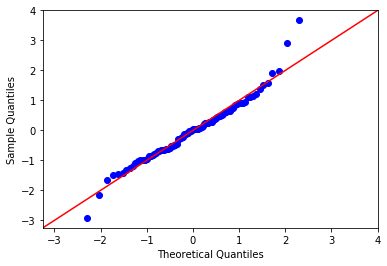

In [14]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

> **Comment:** Overall, looks fairly robust, although there are some violations near the tails.

## Checking for Homoscedasticity

You should also check that your errors do not display heteroscedasticity; if the errors appear to increase or decrease based on the target variable, then the model does not meet the initial assumptions.

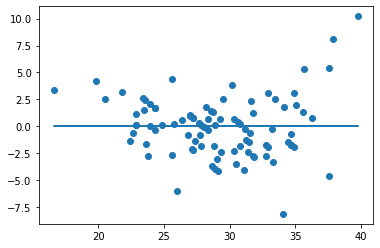

In [15]:
plt.scatter(model.predict(df[x_cols]), model.resid)
plt.plot(model.predict(df[x_cols]), [0 for i in range(len(df))])

> **Comment:** There appears to be some issues with high outliers displaying disproportionate errors. Further work with outliers could be warranted.

## Model Refinement III
 
Due to the particularly large errors visible above ~37MPG, it's reasonable to remove these outliers and retrain the model on the remaining subset. While the model will be specific to this subset, it could prove to be more accurate and reflective of the general domain.

In [16]:
#Finding a cutoff point
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, df['MPG_Highway'].quantile(q=q)))

0.9 percentile: 36.0
0.91 percentile: 36.0
0.92 percentile: 36.64
0.93 percentile: 37.0
0.94 percentile: 37.0
0.95 percentile: 37.39999999999999
0.96 percentile: 38.95999999999998
0.97 percentile: 41.47999999999999
0.98 percentile: 43.47999999999999


In [17]:
subset = df[df['MPG_Highway'] < 38]
print('Percent removed:',(len(df) - len(subset))/len(df))
outcome = 'MPG_Highway'
x_cols = ['Passengers', 'Wheelbase', 'Weight', 'Fueltank']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=subset).fit()
model.summary()

Percent removed: 0.053763440860215055


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MPG_Highway   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     52.42
Date:                Mon, 30 Sep 2019   Prob (F-statistic):           5.93e-22
Time:                        17:09:02   Log-Likelihood:                -191.69
No. Observations:                  88   AIC:                             393.4
Df Residuals:                      83   BIC:                             405.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.6170      0.236    121.154      0.000      28.147      29.087
Passengers    -0.6135      0.330     -1.860      0.066      -1.270       0.043
Wheelbase      1.4837      0.583      2.547      0.013       0.325       2.642
Weight        -3.2860      0.719     -4.570      0.000      -4.716      -1.856
Fueltank      -1.3575      0.518     -2.619      0.010      -2.388      -0.327
==============================================================================
Omnibus:                        2.603   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                1.940
Skew:                          -0.257   Prob(JB):                        0.379
Kurtosis:                       3.515   Cond. No.                         6.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Rechecking Normality

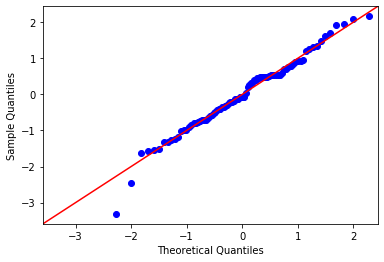

In [18]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Rechecking Homoscedasticity

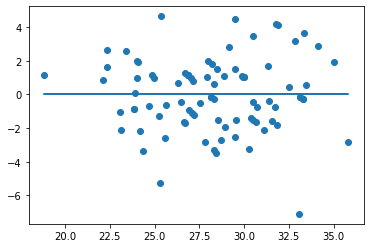

In [19]:
plt.scatter(model.predict(subset[x_cols]), model.resid)
plt.plot(model.predict(subset[x_cols]), [0 for i in range(len(subset))])

> **Comments:** Awesome! The normality assumption as seen through the Q-Q plot appears improved. Similarly, there are no discernible patterns in the residuals, having removed some of the heavy outliers. There was marginal loss in model performance despite subsetting the data.

## Summary 

In this lesson, you reviewed some of the key steps towards building and evaluating a linear regression model. Next, you'll get a chance to continue on with the full Data Science process yourself and attempt building a model to meet the original specs from your new boss at Lego!